In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [ ]:
tf.__version__

'2.7.0'

In [ ]:
keras.__version__

'2.7.0'

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test,y_test) = fashion_mnist.load_data()

In [ ]:
print("Shape of the training set of features: ",X_train_full.shape)
print("Shape of the training set of target: ",y_train_full.shape)
print("Shape of the testing set of features: ",X_test.shape)
print("Shape of the testing set of target: ",y_test.shape)

Shape of the training set of features:  (60000, 28, 28)
Shape of the training set of target:  (60000,)
Shape of the testing set of features:  (10000, 28, 28)
Shape of the testing set of target:  (10000,)


In [ ]:
X_train_full.dtype

dtype('uint8')

In [ ]:
# we see that dataset is already divided into training and testing set but we don't have validation set
# We must scale the input features, we just scale the pixel intensities down to 0 to 1 range by dividing them by 255.0

X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [ ]:
X_train.shape

(55000, 28, 28)


Label	Description

0	T-shirt/top

1	Trouser

2	Pullover

3	Dress

4	Coat

5	Sandal

6	Shirt

7	Sneaker

8	Bag

9	Ankle boot

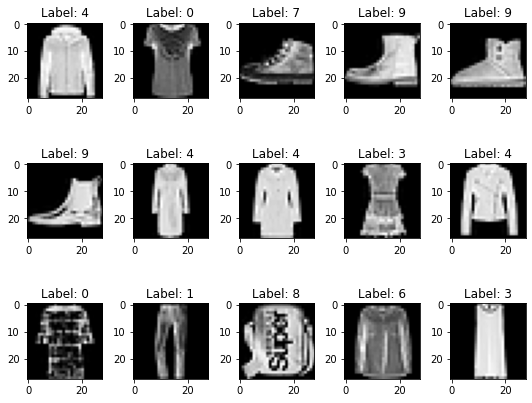

In [ ]:
num_row = 3
num_col = 5

# get a segment of the dataset
num = num_row*num_col
images = X_train[:num]
labels = y_train[:num]

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num_row*num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [ ]:
from keras import activations
# creating the model
from keras.models import Sequential
from keras.layers import Dense, Flatten

model = Sequential()
model.add(Flatten(input_shape=[28,28]))   # converts each input image into 1-D array, it simply computes X.reshape(-1,1)
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))  # softmax because the classes are exclusive

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# to fetch the model's layers
model.layers

In [ ]:
model.layers[1].name

'dense'

In [ ]:
# all the parameters of a layer can be accessed using the get_weights() and set_weights() method
model.get_weights()

In [ ]:
# compiling the model

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

# sparse_categorical_crossentropy because we have sparse labels i.e, for each instance there is just a target class index, from 0 to 9

In [ ]:
model.fit(X_train, y_train, epochs = 30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4859 - accuracy: 0.8233 - val_loss: 0.3874 - val_accuracy: 0.8608
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3662 - accuracy: 0.8651 - val_loss: 0.3449 - val_accuracy: 0.8752
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3303 - accuracy: 0.8781 - val_loss: 0.3210 - val_accuracy: 0.8810
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3039 - accuracy: 0.8861 - val_loss: 0.3167 - val_accuracy: 0.8908
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2860 - accuracy: 0.8925 - val_loss: 0.3254 - val_accuracy: 0.8838
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2734 - accuracy: 0.8973 - val_loss: 0.3052 - val_accuracy: 0.8914
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2572 - accuracy: 0.9023 - val_loss: 0.3149 - val_accuracy

In [ ]:
loss = pd.DataFrame(model.history.history)
loss[:5]

,loss,accuracy,val_loss,val_accuracy
0,0.485913,0.823345,0.387370,0.8608
1,0.366209,0.865091,0.344923,0.8752
2,0.330317,0.878055,0.320990,0.8810
3,0.303894,0.886073,0.316710,0.8908
4,0.285987,0.892455,0.325396,0.8838


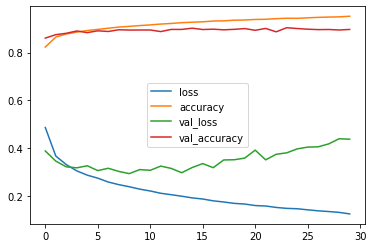

In [ ]:
loss.plot()